1. Import libraries

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

2. Load dataset 

In [10]:
df = pd.read_csv('C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/LabProject(Titanic)/Titanic-Dataset.csv')  
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3. Data processing

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.fillna({'Age': df['Age'].median()}, inplace=True)
# Display first few rows to verify
print(df[['Age']].head(10))

    Age
0  22.0
1  38.0
2  26.0
3  35.0
4  35.0
5  28.0
6  54.0
7   2.0
8  27.0
9  14.0


In [13]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
print(df.head()) # Print the first few rows
print(df.dtypes) # Print the datatypes of the columns.

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         2  
1          PC 17599  71.2833   C85         0  
2  STON/O2. 3101282   7.9250   NaN         2  
3            113803  53.1000  C123         2  
4            373450   8.0500   NaN         2  
PassengerId   

4. Seperate Features (X) and Target (Y)

In [15]:
X = df.drop('Survived', axis=1)
y = df['Survived']

5. Split data into Training & testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6. Choose & train a model

In [19]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
#model.fit(X_train, y_train)

In [25]:

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Encode categorical columns
for col in categorical_cols:
    if len(X[col].unique()) > 2: #Use OneHotEncoder if more than 2 categories.
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_features = encoder.fit_transform(X[[col]])
        encoded_feature_names = encoder.get_feature_names_out([col])
        encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
        X = pd.concat([X.drop(col, axis=1).reset_index(drop=True), encoded_df], axis=1)
    else: #Use LabelEncoder if 2 or less categories.
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Convert to NumPy arrays
X_train = np.array(X)
y_train = np.array(y)

#Example of using train test split.
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a model (example: Logistic Regression)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)

print("Model trained!")

Model trained!


7. Make prediction on Test set

In [26]:
y_pred = model.predict(X_test)

8. Calculate Evaluation Metrics

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Assuming y_test and y_pred are defined
y_pred = model.predict(X_test) # example line to show where y_pred comes from.

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{confusion}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-score: 0.7638888888888888
Confusion Matrix:
[[90 15]
 [19 55]]
ROC AUC: 0.8823680823680824


9. Confusion Matrix Visualization

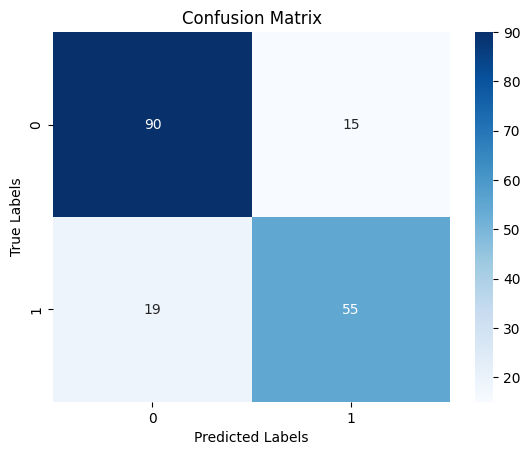

In [ ]:

# Assuming y_test and y_pred are defined
confusion = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

10. ROC Curve(for binary classification)

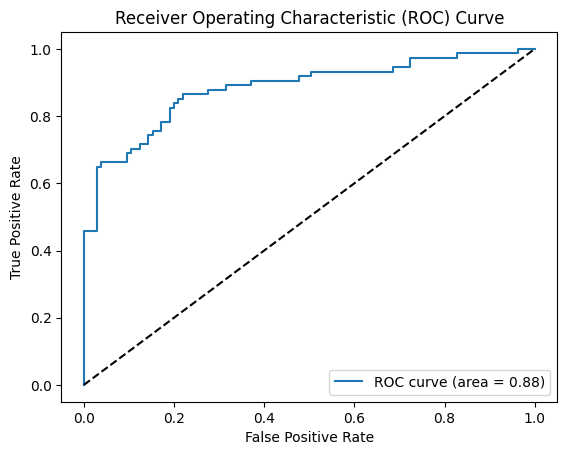

In [34]:
#from sklearn.metrics import roc_curve, auc

# Assuming y_test and model are defined
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

11.Features Importance (for tree based models)

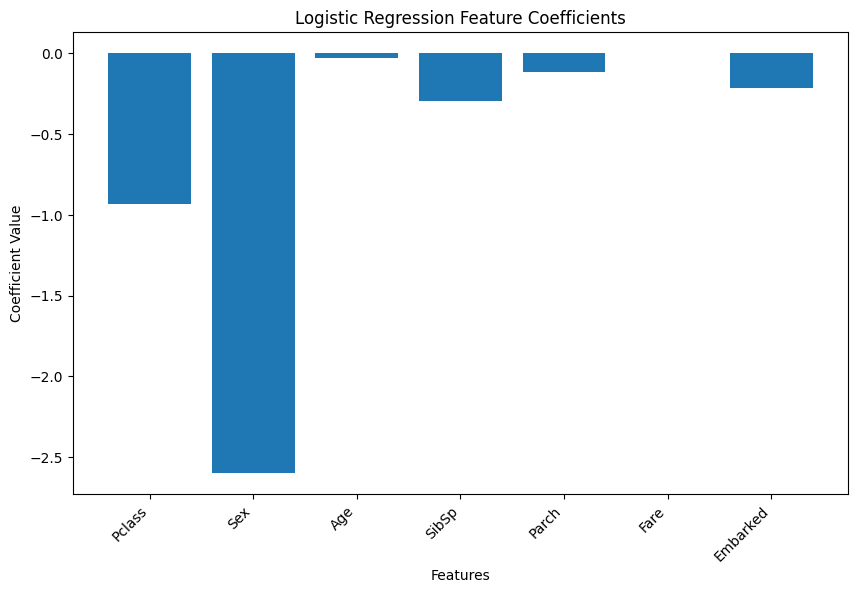

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming model is your trained LogisticRegression model
coefficients = model.coef_[0]  # Get the coefficients

# Get feature names (assuming X is a pandas DataFrame)
feature_names = X.columns

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Logistic Regression Feature Coefficients")
plt.xticks(rotation=45, ha="right")
plt.show()

12. Residual Plots (for regression)

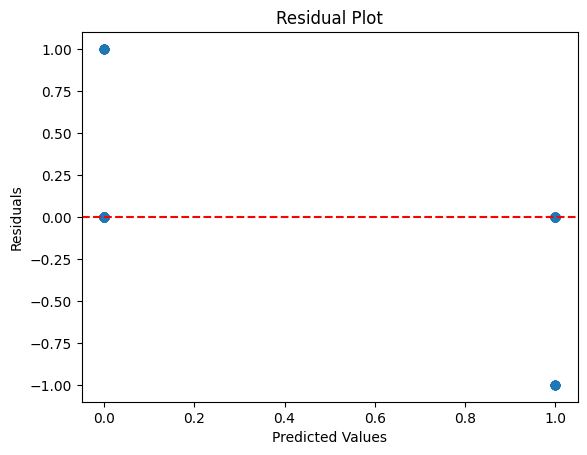

In [37]:
import matplotlib.pyplot as plt

# Assuming model is a regression model
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()

13. Histograms for predictions

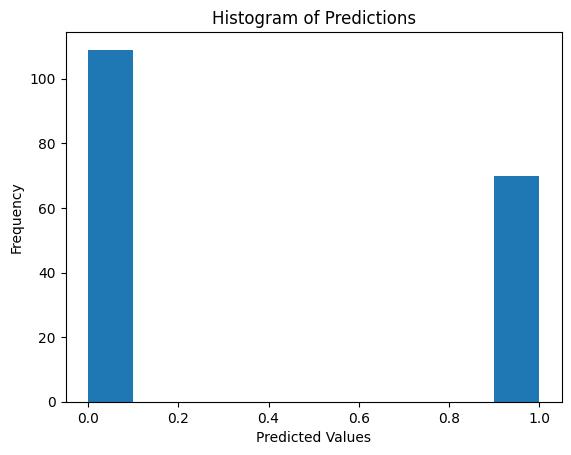

In [38]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.hist(y_pred)
plt.xlabel("Predicted Values")
plt.ylabel("Frequency")
plt.title("Histogram of Predictions")
plt.show()